# 3x3 assembly inputfile that: 

### Import module/Set up XS path/Create openMC model/Clean directory

In [1]:
import sys
import os 
import openmc
import numpy as np
import matplotlib.pyplot as plt
import openmc.mgxs as mgxs
import pandas as pd
from IPython.display import Image
import glob

### Pablo environnement

In [2]:
model=openmc.Model()

clean_file_list = ["model.xml", "materials.xml", "geometry.xml","plots.xml","geometry.xml","settings.xml","tallies.out","summary.h5","statepoint.50.h5"]
for file in clean_file_list :
    path_file = os.path.join(os.getcwd(), file)
    if os.path.exists(path_file):
        os.remove(path_file)

### Define Materials

In [4]:
uo2 = openmc.Material(name='uo2')
uo2.add_nuclide('U234', 6.11864E-06, 'ao')
uo2.add_nuclide('U235', 7.18132E-04, 'ao')
uo2.add_nuclide('U236', 3.29861E-06, 'ao')
uo2.add_nuclide('U238', 2.21546E-02, 'ao')
uo2.add_nuclide('O16', 4.57642E-02, 'ao')
uo2.set_density('g/cm3', 10.257 )
uo2.temperature=565


zirconium = openmc.Material(name="zirconium")
zirconium.add_nuclide('Zr90', 2.18865E-02, 'ao')
zirconium.add_nuclide('Zr91', 4.77292E-03, 'ao')
zirconium.add_nuclide('Zr92', 7.29551E-03, 'ao')
zirconium.add_nuclide('Zr94', 7.39335E-03, 'ao')
zirconium.add_nuclide('Zr96', 1.19110E-03, 'ao')
zirconium.add_nuclide('Sn112',4.68066E-06, 'ao')
zirconium.add_nuclide('Sn114', 3.18478E-06, 'ao')
zirconium.add_nuclide('Sn115', 1.64064E-06, 'ao')
zirconium.add_nuclide('Sn116', 7.01616E-05, 'ao')
zirconium.add_nuclide('Sn117', 3.70592E-05, 'ao')
zirconium.add_nuclide('Sn118', 1.16872E-04, 'ao')
zirconium.add_nuclide('Sn119', 4.14504E-05, 'ao')
zirconium.add_nuclide('Sn120', 1.57212E-04, 'ao')
zirconium.add_nuclide('Sn122', 2.23417E-05, 'ao')
zirconium.add_nuclide('Sn124', 2.79392E-05, 'ao')
zirconium.add_nuclide('Fe54', 8.68307E-06, 'ao')
zirconium.add_nuclide('Fe56', 1.36306E-04, 'ao')
zirconium.add_nuclide('Fe57', 3.14789E-06, 'ao')
zirconium.add_nuclide('Fe58', 4.18926E-07, 'ao')
zirconium.add_nuclide('Cr50', 3.30121E-06, 'ao')
zirconium.add_nuclide('Cr52', 6.36606E-05, 'ao')
zirconium.add_nuclide('Cr53', 7.21860E-06, 'ao')
zirconium.add_nuclide('Cr54', 1.79686E-06, 'ao')
zirconium.add_nuclide('Hf174', 3.54138E-09, 'ao')
zirconium.add_nuclide('Hf176', 1.16423E-07, 'ao')
zirconium.add_nuclide('Hf177', 4.11686E-07, 'ao')
zirconium.add_nuclide('Hf178', 6.03806E-07, 'ao')
zirconium.add_nuclide('Hf179', 3.01460E-07, 'ao')
zirconium.add_nuclide('Hf180', 7.76449E-07, 'ao')
zirconium.set_density('g/cm3',  6.56)
zirconium.temperature=565



water = openmc.Material(name="water")
water.add_nuclide('H1',4.96224E-02, 'ao')
water.add_nuclide('O16', 2.48112E-02, 'ao')
water.add_nuclide('B10', 1.07070E-05, 'ao')
water.add_nuclide('B11', 4.30971E-05, 'ao')
water.set_density('g/cm3', 0.743)
water.temperature=565
water.add_s_alpha_beta('c_H_in_H2O')

helium = openmc.Material(name="helium")
helium.add_nuclide('He4',1, 'ao')
helium.temperature=565
helium.set_density('g/cm3', 0.178E-03 )


model.materials = openmc.Materials([uo2, zirconium, water,helium])

#Perso path
# model.materials.cross_sections = '/home/pablo/internship/xs_for_input/cross_sections.xml'
#Mac path
model.materials.cross_sections = '/Users/pablogarcia44/repo/endfb-vii.1-hdf5/cross_sections.xml'

### Create pincell

In [5]:
fuel_outer_radius = openmc.ZCylinder(r=0.4096)
clad_inner_radius = openmc.ZCylinder(r=0.418)
clad_outer_radius = openmc.ZCylinder(r=0.475)
pitch = 1.26
rod_height=1
left = openmc.XPlane(-pitch/2, boundary_type='reflective')
right = openmc.XPlane(pitch/2, boundary_type='reflective')
bottom = openmc.YPlane(-pitch/2, boundary_type='reflective')
top = openmc.YPlane(pitch/2, boundary_type='reflective')
fuel_region = -fuel_outer_radius
gap_region = +fuel_outer_radius & -clad_inner_radius
clad_region = +clad_inner_radius & -clad_outer_radius
water_region = +left & -right & +bottom & -top & +clad_outer_radius
fuel = openmc.Cell(name='fuel')
fuel.fill = uo2
fuel.region = fuel_region
gap = openmc.Cell(name='gap')
gap.region = gap_region
gap.fill = helium    
clad = openmc.Cell(name='clad')
clad.fill = zirconium
clad.region = clad_region
moderator = openmc.Cell(name='moderator')
moderator.fill = water
moderator.region = water_region 
root_universe = openmc.Universe(cells=(fuel ,gap, clad, moderator))
model.geometry = openmc.Geometry(root_universe)


### Plot

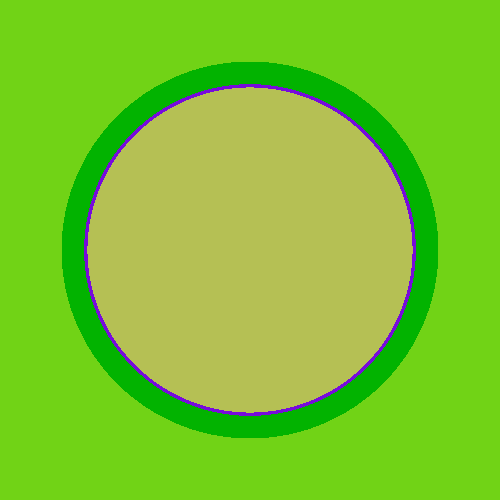

In [7]:
model.materials.export_to_xml()
model.geometry.export_to_xml()
plot = openmc.Plot.from_geometry(model.geometry)
plot.pixels = (500, 500)
plot.width = (pitch, pitch)
plot.origin = (0., 0., 0)
plot.color_by = 'cell'
plot.to_ipython_image()

### Choose settings

In [29]:
bounds = [-pitch/2, -pitch/2, -rod_height/2, pitch/2, +pitch/2, rod_height/2]
uniform_dist = openmc.stats.Box(bounds[:3], bounds[3:], only_fissionable=True)
source = openmc.IndependentSource(space=uniform_dist)
settings = openmc.Settings()
settings.source = source
settings = openmc.Settings()
settings.source = source
settings.batches = 50
settings.inactive = 20
settings.particles = 20000
settings.keff_trigger = {'type':'std_dev','threshold':0.00010}
settings.trigger_active = True
settings.trigger_max_batches = 50000
settings.output = {'tallies':True}
settings.temperature['method'] = 'interpolation'
model.settings = settings

### Define and choose energy group

In [30]:
# choose_group=openmc.mgxs.GROUP_STRUCTURES['XMAS-172']
# name_group='XMAS172'
choose_group=openmc.mgxs.GROUP_STRUCTURES['SHEM-361']
name_group='SHEM-361'


### Create MGXS tallies for mgxs directory

In [31]:
mgxs_lib = openmc.mgxs.Library(model.geometry)
groups = openmc.mgxs.EnergyGroups(choose_group)
mgxs_lib.energy_groups = groups
mgxs_lib.scatter_format = "legendre"
mgxs_lib.legendre_order = 3
# mgxs_lib.mgxs_types = ['total', 'absorption', 'fission', 'nu-fission', 'chi', 'scatter matrix', 'nu-scatter matrix', 'inverse-velocity']
mgxs_lib.mgxs_types = ['total', 'absorption', 'nu-fission', 'fission' ,'chi', 'consistent nu-scatter matrix', 'multiplicity matrix']
mgxs_lib.by_nuclide = False
mgxs_lib.domain_type = 'cell'
mgxs_lib.domains = model.geometry.get_all_material_cells().values()
mgxs_lib.build_library()
tallies = openmc.Tallies()
mgxs_lib.add_to_tallies_file(tallies, merge=True)
model.tallies = tallies

/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mgxs/library.py:401: RuntimeWarning: The P0 correction will be ignored since the scattering order 3 is greater than zero
  warn(msg, RuntimeWarning)


### Create power tally

### Run OpenMC model

In [32]:
# statepoint_filename = model.run()
sp_file = model.run()

/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=285.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=174.
  warn(msg, IDWarning)
/opt/anaconda3/envs/openmc-env/lib/python3.12/site-packages/openmc/mixin.py:70: IDWarning: Another Filter instance already exists with id=182.
  warn(msg, IDWarning)


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

KeyboardInterrupt: 

ce_spfile = './statepoint_ce.h5'
os.rename(statepoint_filename, ce_spfile)
ce_sumfile = './summary_ce.h5'
os.rename('summary.h5', ce_sumfile)
sp = openmc.StatePoint(ce_spfile, autolink=False)
su = openmc.Summary(ce_sumfile)
sp.link_with_summary(su)

mgxs_lib.load_from_statepoint(sp)
mgxs_file = mgxs_lib.create_mg_library(xs_type='macro', xsdata_names=['fuel', 'clad', 'moderator'])
mgxs_file.xsdatas[0].temperatures=[565.]
mgxs_file.xsdatas[1].temperatures=[565.]
mgxs_file.xsdatas[2].temperatures=[565.]
mgxs_file.export_to_hdf5('mgxs_order1.h5')